# Problem 1
## Part 1
Generate 20 random points in d = 3 from a Gaussian multivariate distribution with mean $[0, 0, 0]$ and cov matrix:
$$\begin{bmatrix}
    0.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 0.7
    \end{bmatrix}$$
    
Call this data label 1. Do the same for another Gaussian with mean $[1, 1, 1]$ and cov matrix:
$$\begin{bmatrix}
    0.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 0.01 
    \end{bmatrix}$$
    
Call this data label 2. Create a 3 d plot of the data points, labeled.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import numpy.matlib
from sklearn.preprocessing import normalize

In [2]:
# Define variables
mu_1 = np.zeros(3)
mu_2 = np.ones(3)
var_1 = np.array([0.5, 0.5, 0.7])
var_2 = np.array([0.5, 0.5, 0.01])
cov_1 = np.multiply(np.matlib.eye(3) , var_1)
cov_2 = np.multiply(np.matlib.eye(3), var_2)
print(cov_1)
print(cov_2)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.7]]
[[0.5  0.   0.  ]
 [0.   0.5  0.  ]
 [0.   0.   0.01]]


In [3]:
# Sample the two vectors of Gaussians
label_1 = np.random.multivariate_normal(mean=mu_1, cov=cov_1, size=20)
label_2 = np.random.multivariate_normal(mean=mu_2, cov=cov_2, size=20)

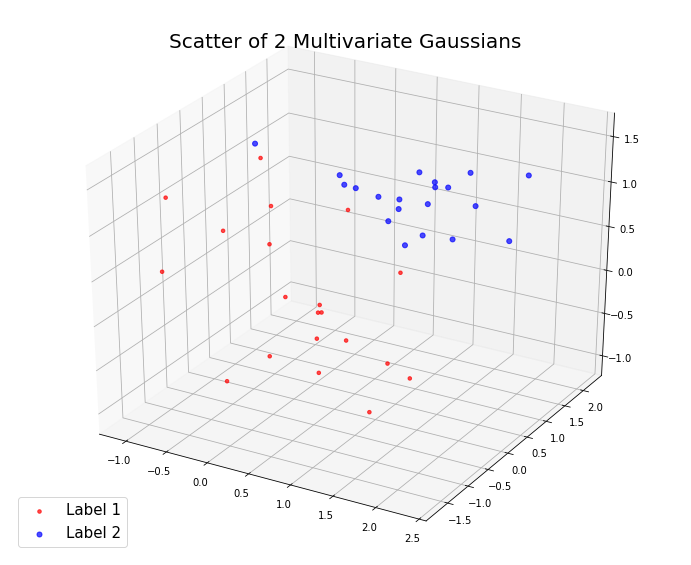

In [4]:
# Why can't python plotting be more like MATLAB plotting :(

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111, projection='3d')
_ = ax1.scatter(label_1[:,0], label_1[:,1], label_1[:,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,1], label_2[:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians', FontSize=20)
_ = plt.legend(loc=3, prop={'size' : 15})

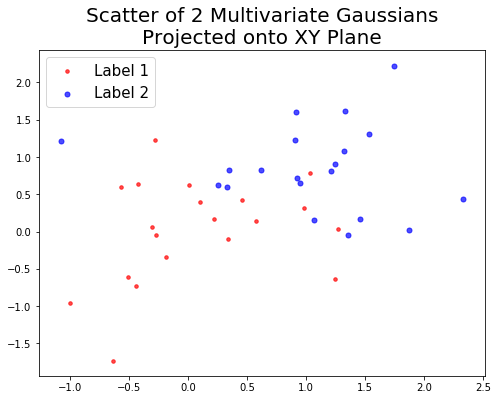

In [5]:
# Projection onto x, y plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,0], label_1[:,1], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,1], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto XY Plane', FontSize=20)
_ = plt.legend(loc=2, prop={'size' : 15})

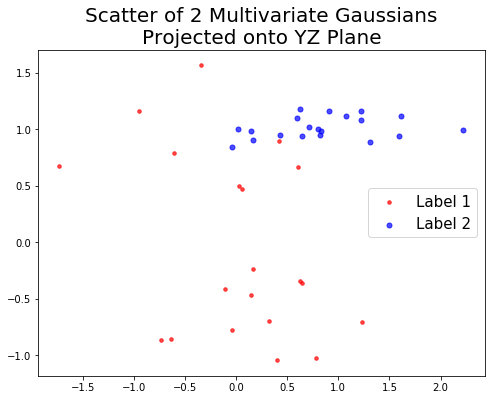

In [6]:
# Projection onto y, z plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,1], label_1[:,2], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,1], label_2[:,2], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto YZ Plane', FontSize=20)
_ = plt.legend(loc=5, prop={'size' : 15})

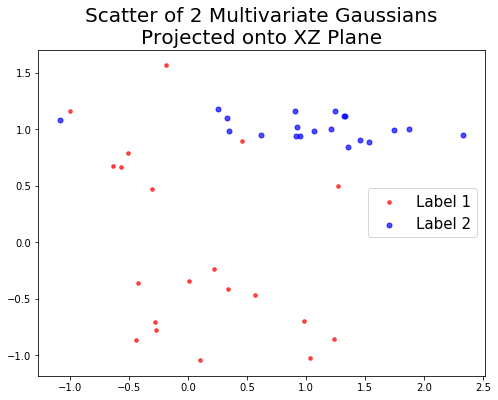

In [7]:
# Projection onto x, z plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,0], label_1[:,2], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,2], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto XZ Plane', FontSize=20)
_ = plt.legend(loc=5, prop={'size' : 15})

## Part 2

The points don't look like much. The label 2 points have some interesting shapes in a few directions.

## Part 3
Concatenate points and find covariance matrix

In [8]:
# Split up the distribution

G = np.vstack((label_1, label_2))
X = G[:,0]
Y = G[:,1]
Z = G[:,2]

In [9]:
# Calculate the covariance matrix by hand

def Cov(x, y):
    return np.dot(x,y)/(x.shape[0] - 1)
  
mu_1 = (np.sum(X)/X.shape[0])
mu_2 = (np.sum(Y)/Y.shape[0])
mu_3 = (np.sum(Z)/Z.shape[0])

mse_1 = abs(np.subtract(X, mu_1))
mse_2 = abs(np.subtract(Y, mu_2))
mse_3 = abs(np.subtract(Z, mu_3))

means = [mu_1, mu_2, mu_3]
mses = [mse_1, mse_2, mse_3]

cov_matrix = np.zeros((3,3))
for i in range(cov_matrix.shape[0]):
    for j in range(cov_matrix.shape[1]):
        cov_matrix[i,j] = Cov(mses[i], mses[j])

In [10]:
print(cov_matrix)
print(np.cov(G.T))

[[0.7030385  0.5016224  0.46404408]
 [0.5016224  0.57498467 0.38627101]
 [0.46404408 0.38627101 0.61511435]]
[[0.7030385  0.24424171 0.14362731]
 [0.24424171 0.57498467 0.13131449]
 [0.14362731 0.13131449 0.61511435]]


# Part 4
Using $k=2$ Find the two eigenvectors of the covariance matrix with the largest eigenvalues Project the data points onto these two vectors and show the 2d plot.

In [11]:
Lamba, V = np.linalg.eig(cov_matrix)
print(Lamba)

# Project u onto v
def proj(u, v):
    a = (np.dot(u, v))/(np.dot(u,u))
    w = a * v
    return w

[1.53904232 0.13107124 0.22302395]


In [12]:
# The two largest eigenvalues are 1 and 3, so we grab the two eigenvectors 
# associated with them. They automatically have an L2 norm == 1
v_1 = V[:,0]
v_3 = V[:,2] 

# Then we center the data. 
G_c_1 = G[:,0] - np.mean(G[:,0])
G_c_2 = G[:,1] - np.mean(G[:,1])
G_c_3 = G[:,2] - np.mean(G[:,2])
G_centered = np.column_stack((G_c_1, G_c_2, G_c_3))

projection = np.zeros((40, 3))
for i in range(G.shape[0]):
    proj_1 = np.dot(np.dot(G_centered[i,:], v_1), v_1)
    proj_2 = np.dot(np.dot(G_centered[i,:], v_3), v_3)
    tmp = proj_1 + proj_2
    projection[i,:] = tmp

#print(projection)
#print(np.mean(G_c_1))

<IPython.core.display.Javascript object>


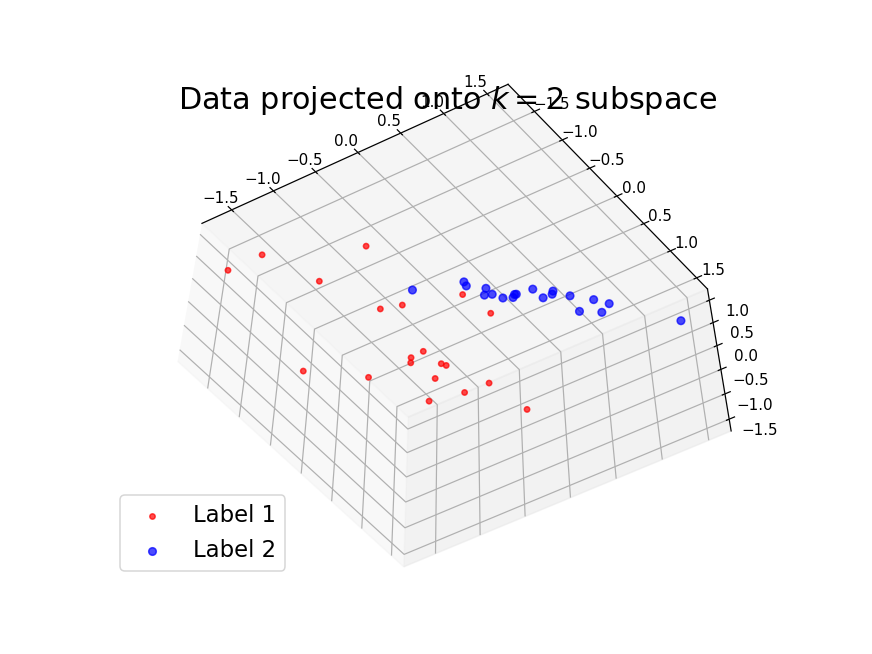

In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(projection[:20,0], projection[:20,1], projection[:20,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax.scatter(projection[20:,0], projection[20:,1], projection[20:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Data projected onto $k=2$ subspace', FontSize=20)
_ = plt.legend(loc=3, prop={'size' : 15})

for ii in range(0,360,1):
        _ = ax.view_init(elev=10., azim=ii)
        #savefig("movie%d.png" % ii)


# Problem 2

In [4]:
import imageio
from PIL import Image
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

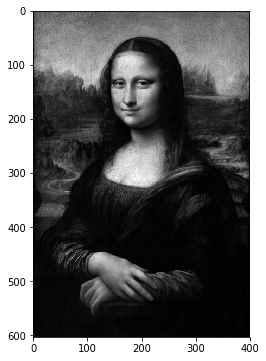

In [81]:
mona_lisa = imageio.imread('mona_lisa.png')
img = Image.open('mona_lisa.png')
imggray = img.convert('LA')
#plt.figure(figsize=(9, 6))
#plt.imshow(imggray);

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');
#print(np.count_nonzero(imgmat))
#print(imgmat.nbytes)

In [74]:
U, sigma, V = np.linalg.svd(imgmat)
non_compr_bytes = sum([matrix.nbytes for matrix in [U, sigma, V]])
print("The non-compressed byte storage is: {} bytes".format(non_compr_bytes))

The non-compressed byte storage is: 4192072 bytes


In [87]:
def k_rank(k):
    #reconstimg= np.matrix(U[:,:k]) * np.diag(sigma[:k]) * np.matrix(V[:k,:])
    U_k = np.matrix(U[:,:k])
    Sigma_k = np.diag(sigma[:k])
    V_k = np.matrix(V[:k,:])
    reconst_img= U_k * Sigma_k * V_k
    compr_bytes = sum([matrix.nbytes for matrix in [U_k, Sigma_k, V_k]])
    
    #print("Shape of U for rank {} is: {}".format(k, U_k.shape))
    #print("Shape of Sigma for rank {} is: {}".format(k, Sigma_k.shape))
    #print("Shape of V for rank {} is: {}".format(k, V_k.shape))
    #print("The compressed byte storage for rank {} is: {} bytes".format(k, compr_bytes))
    #print(reconstimg.shape)
    #plt.imshow(reconstimg,cmap='gray')
    
    return reconst_img               

### Rank 2 Approximation

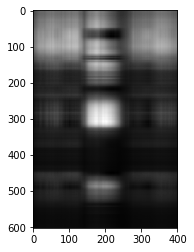

In [88]:
_ = plt.imshow(k_rank(2),cmap='gray')

### Rank 5 Approximation

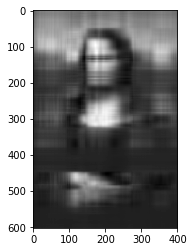

In [89]:
_ = plt.imshow(k_rank(5),cmap='gray')

### Rank 10 Approximation

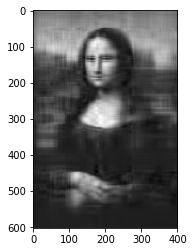

In [90]:
_ = plt.imshow(k_rank(10),cmap='gray')

### Conclusion

<p>
    The total compressed pixels needed are:
    <ul>
        <li>Rank 2: $\quad2,010 \,\, pixels$</li>
        <li>Rank 5: $\quad5,040 \,\, pixels$</li>
        <li>Rank 10: $\,\,\,10,130 \,\, pixels$</li>
    </ul>
</p>
<p>
    Then, the number of bits for each is $(pixels) * (number \, of  \, bytes) * (bits \, per \, byte)$ which is equivalent to $(pixels) * 16$
    <ul>
        <li>Rank 2: $\quad 32,160 \,\, bits$</li>
        <li>Rank 5: $\quad 80,640 \,\, bits$</li>
        <li>Rank 10: $\,\,\, 162,080 \,\, bits$</li>
    </ul>
</p>
        

## Problem 3:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

In [7]:
# Load the files
filename1 = 'CorrMat1.csv'
filename2 = 'CorrMat3.csv'

#read the files while preserving header row
df1 = pd.read_csv(filename1,header = None)
df2 = pd.read_csv(filename2,header = None)

#test to check if
print(df1.shape)
print(df2.shape)


(100, 100)
(100, 100)


## Part A:
we plan on using PCA to reduce dimensionality to 1 and preserve most of the data but also clear out the outliers and then reconstruct the matrix. We also tried to to reduce dimensionality to 2 but the reconstructed image was still capturing in that case.

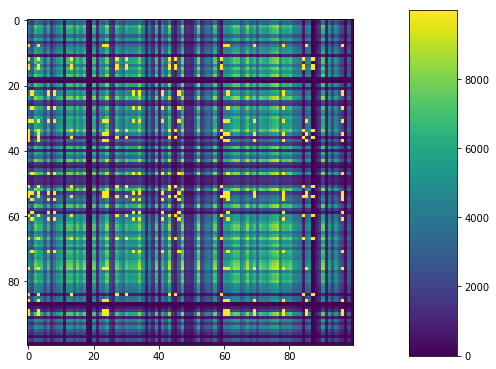

[0.73255454]


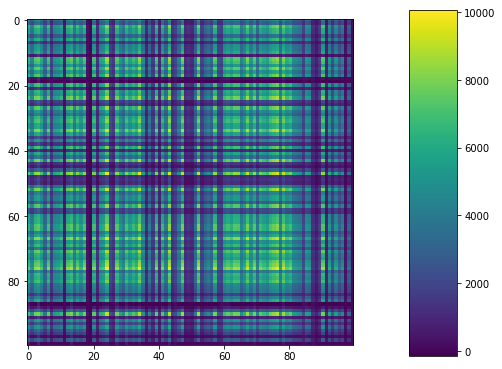

In [8]:
## plotting the original image
plt.figure(figsize=(9,6))
plt.imshow(df1);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

## does PCA analysis with 1 component aka reduces dimensionality to 1
pca = PCA(n_components = 1)
pca.fit(df1)

# to check variance preserved
print(pca.explained_variance_ratio_)


# Reducing the original matrix and then recovering by inverse transform
df1_reduced = pca.fit_transform(df1)
df1_recovered = pca.inverse_transform(df1_reduced)
plt.figure(figsize=(9,6))
plt.imshow(df1_recovered);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()


Reducing dimensionality to 1 and projecting the data again as image removed most of the outlier points and gave us a better visual. We can use the reconstructed matrix as replacement of the original matrix to replace the outliers found.

## part B
Repeating the same process as part one

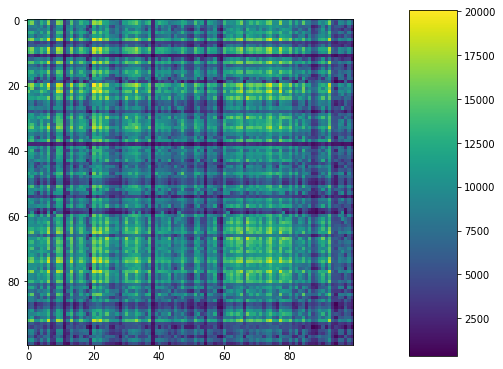

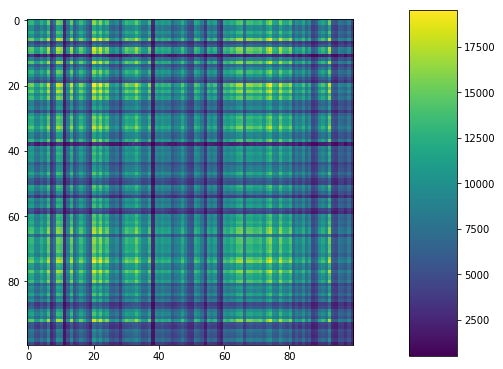

In [9]:

#plotting the original matrix
plt.figure(figsize=(9,6))
plt.imshow(df2);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

## fitting 2nd matrix with same pca model of dimensionality 1
pca.fit(df2)



# Reducing the original matrix and then recovering by inverse transform
df2_reduced = pca.fit_transform(df2)
df2_recovered = pca.inverse_transform(df2_reduced)
plt.figure(figsize=(9,6))
plt.imshow(df2_recovered)
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

In [10]:
## this code can check for outliers and return indexes within specified std dev
#mean = test_col.mean()
#stdev = test_col.std()
#idx = []
#for index,value in test_col.iteritems():
#    if (value < (mean-1.4*stdev))or(value>(mean+1.4*stdev)):
#                idx.append(index)
###finding outlier index
#def find_outlier_index(column):
#    mean = column.mean(axis=0)
#    stdev = column.std(axis=0)
#    print(mean)
#    print(column.index)
#    print(row.index)
#df1.apply(find_outlier_index,axis =0)